## Importing libraries

In [1]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from statsmodels import robust
from astropy.stats import biweight_location

from utils import *

import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
close_price = pd.read_csv("data/SX5E/close_mat.csv")
index_composition = pd.read_csv("data/SX5E/SX5E Index_compositionMat.csv")
capitalization = pd.read_csv("data/SX5E/capitalization_mat.csv")

In [3]:
display(close_price.head())

,Unnamed: 0,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
0,20191013,132.500000,NaN,177.550003,27.500000,38.430000,66.820000,138.955765,22.510000,NaN,...,9.838,13.836,NaN,NaN,8.84,6.797,NaN,83.940002,15.456,11.220
1,20191012,132.500000,NaN,177.550003,27.500000,38.430000,66.820000,138.955765,22.510000,NaN,...,9.838,13.836,NaN,NaN,8.84,6.797,NaN,83.940002,15.456,11.220
2,20191011,132.500000,NaN,177.550003,27.500000,38.430000,66.820000,138.955765,22.510000,NaN,...,9.838,13.836,NaN,NaN,8.84,6.797,NaN,83.940002,15.456,11.220
3,20191010,130.600006,NaN,174.449997,27.120001,38.770000,65.839996,132.451080,21.299999,NaN,...,9.467,13.682,NaN,NaN,8.68,6.464,NaN,83.589996,15.304,10.735
4,20191009,130.949997,NaN,169.350006,27.139999,39.049999,64.760002,129.061081,20.600000,NaN,...,9.064,13.600,NaN,NaN,8.82,6.294,NaN,84.290001,15.350,10.490


In [4]:
display(index_composition.head())

,Unnamed: 0,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
0,20191013,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,20191012,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,20191011,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,20191010,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,20191009,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [5]:
display(capitalization.head())

,Unnamed: 0,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
0,20191013,18334.214844,NaN,105009.804688,10030.963867,3713.159912,28817.357422,80811.640625,1884.000000,NaN,...,38334.421875,50282.589844,NaN,NaN,23349.259766,14047.857422,NaN,169495.171875,73593.101562,32366.208984
1,20191012,18334.214844,NaN,105009.804688,10030.963867,3713.159912,28817.357422,80811.640625,1884.000000,NaN,...,38334.421875,50282.589844,NaN,NaN,23349.259766,14047.857422,NaN,169495.171875,73593.101562,32366.208984
2,20191011,18334.214844,NaN,105009.804688,10030.963867,3713.159912,28817.357422,80811.640625,1884.000000,NaN,...,38334.421875,50282.589844,NaN,NaN,23349.259766,14047.857422,NaN,169495.171875,73593.101562,32366.208984
3,20191010,18071.308594,NaN,103377.218750,9902.877930,3746.080078,28394.712891,77128.078125,1782.729980,NaN,...,36888.792969,49722.925781,NaN,NaN,22926.648438,13359.621094,NaN,168788.421875,72869.359375,30967.132812
4,20191009,18119.738281,NaN,101301.351562,9939.473633,3760.209961,27928.945312,75223.796875,1724.140015,NaN,...,35318.476562,49424.921875,NaN,NaN,23296.431641,13008.270508,NaN,170201.906250,73088.390625,30260.384766


## Data Preparation

### Data Formatting

Now let's convert date column into datetime and add a column with the corresponding weekday

In [6]:
close_price = setup_tables(close_price)
index_composition = setup_tables(index_composition)
capitalization = setup_tables(capitalization)

In [7]:
# setting date as index
close_price.set_index(['Date'], drop=True, inplace=True)
capitalization.set_index(['Date'], drop=True, inplace=True)
index_composition.set_index(['Date'], drop=True, inplace=True)

We decided to include only the observations from 2013-01-01 to 2017-12-31 for a total of five years.

- training set, from 2013-01-01 to 2016-12-30	
- testing set (out of sample) from 2017-01-02 to 2017-12-31

In [8]:
close_price = select_time_slice(close_price, 20130101, 20171231)
index_composition = select_time_slice(index_composition, 20130101, 20171231)
capitalization = select_time_slice(capitalization, 20130101, 20171231)

Now we extract the calendar for ONLY the trading days for the considered period.

In [9]:
dates = get_trading_dates(start_period="2013-01-01", end_period="2017-12-31")

close_price = close_price.loc[dates]
index_composition = index_composition.loc[dates]
capitalization = capitalization.loc[dates]

Now let's sum over rows to find the columns (stocks) that have been part of the SX5E index for all the considered period. 

In [10]:
index_composition.loc[:'2016-12-30']

,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,63DU GY Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2013-01-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2013-01-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2016-12-23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2016-12-28,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2016-12-29,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


In [11]:
full_time_stock = get_full_time_stock_in_period(select_time_slice(index_composition))

In [12]:
full_time_stock_train = get_full_time_stock_in_period(select_time_slice(index_composition.loc[:'2016-12-30']))

In [13]:
len(full_time_stock), len(full_time_stock_train)

(41, 41)

In [14]:
# Check if all paired elements are equal
all_equal = True
for i in range(len(full_time_stock)):
    if full_time_stock[i] != full_time_stock_train[i]:
        all_equal = False
        break
all_equal

True

No survivorship BIAS. 

Now we ended up with only 41 stocks that will be our starting point

In [15]:
close_price_red = close_price[full_time_stock]

In [16]:
display(close_price_red)

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,EOAN GY Equity,DBK GY Equity,ABI BB Equity,DTE GY Equity
2013-01-02,154.012894,15.815,70.825317,44.459999,19.275648,1.375,72.603340,128.109375,3.256,13.810000,...,107.500000,7.287,50.169998,62.080002,7.282,18.990000,12.587487,29.078993,67.349998,8.756
2013-01-03,153.926849,15.940,70.815475,44.459999,19.224045,1.372,72.414368,127.208145,3.232,13.825000,...,105.400002,7.245,50.340000,62.000000,7.302,18.940001,12.626961,29.398214,66.540001,8.751
2013-01-04,153.883835,15.995,71.642120,44.384998,19.008257,1.382,73.269699,127.839012,3.236,13.865000,...,105.650002,7.318,49.755001,61.470001,7.392,19.010000,12.723450,29.615286,67.620003,8.875
2013-01-07,151.388641,15.690,70.480888,45.209999,19.224045,1.404,72.981270,126.306915,3.176,13.905000,...,104.199997,7.406,48.750000,60.950001,7.587,18.750000,12.508541,30.453777,66.930000,8.783
2013-01-08,149.710846,15.820,70.776108,45.695000,19.120842,1.403,73.349266,125.630997,3.164,13.575000,...,104.500000,7.451,48.220001,60.650002,7.469,18.840000,12.473454,30.832586,65.900002,8.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,146.484329,14.530,104.166451,63.290001,29.976002,2.830,72.483986,252.449997,5.290,25.290001,...,188.100006,7.372,147.750000,95.360001,15.630,14.020000,9.164000,16.520000,94.209999,15.045
2017-12-22,145.408813,14.565,103.772812,62.950001,29.976002,2.840,72.155785,249.500000,5.285,25.174999,...,186.800003,7.264,147.000000,94.580002,15.545,14.020000,9.213000,16.315001,93.989998,15.005
2017-12-27,144.247269,14.495,103.871231,62.720001,29.929090,2.818,72.125946,251.350006,5.240,25.065001,...,187.600006,7.214,146.500000,94.980003,15.485,14.070000,9.154000,16.070000,94.050003,14.995
2017-12-28,144.118210,14.395,102.739517,62.599998,29.844650,2.790,71.757957,247.800003,5.190,24.975000,...,185.750000,7.147,145.550003,93.889999,15.440,13.960000,9.081000,15.940000,93.180000,14.830


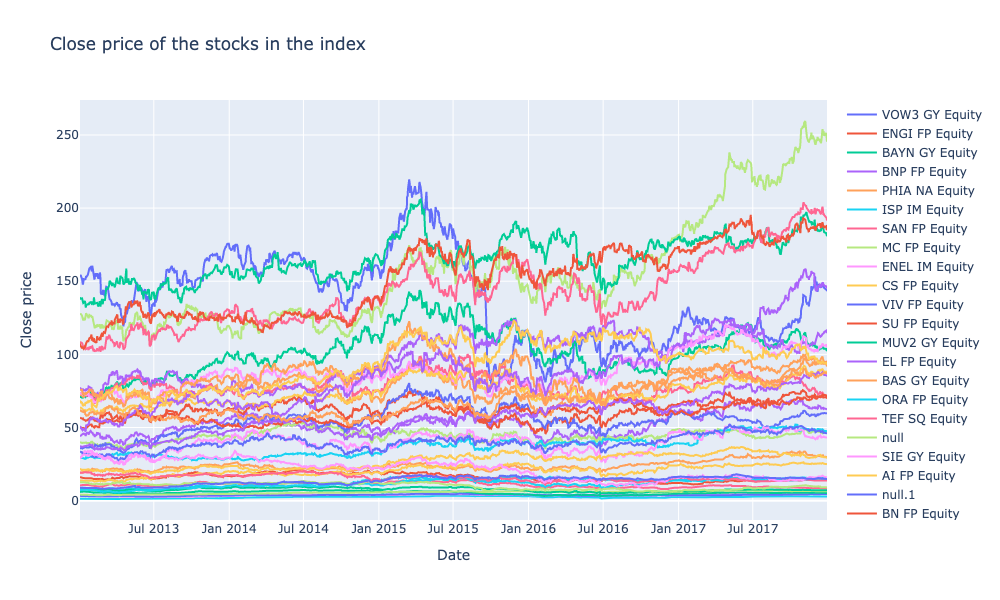

In [17]:
traces = []
for i, stock_name_close in enumerate(close_price_red.columns):
    traces.append(go.Scatter(x=close_price_red.index, y=close_price_red[stock_name_close], mode='lines', name=stock_name_close))

# Creating layout
layout_close = go.Layout(title='Close price of the stocks in the index', xaxis=dict(title='Date'), yaxis=dict(title='Close price'),
                         width=1000, height=600)

# Creating figure
fig_close = go.Figure(data=traces, layout=layout_close)

# Display the figure
fig_close.show(renderer="png")

### Calculate log returns

In [18]:
# only for the 40 stocks

returns = price_to_returns(close_price_red, drop_na=True)
returns

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,EOAN GY Equity,DBK GY Equity,ABI BB Equity,DTE GY Equity
2013-01-03,-0.000559,0.007904,-0.000139,0.000000,-0.002677,-0.002182,-0.002603,-0.007035,-0.007371,0.001086,...,-0.019535,-0.005764,0.003389,-0.001289,0.002746,-0.002633,0.003136,0.010978,-0.012027,-0.000571
2013-01-04,-0.000279,0.003450,0.011673,-0.001687,-0.011225,0.007289,0.011812,0.004959,0.001238,0.002893,...,0.002372,0.010076,-0.011621,-0.008548,0.012325,0.003696,0.007642,0.007384,0.016231,0.014170
2013-01-07,-0.016215,-0.019068,-0.016209,0.018587,0.011352,0.015919,-0.003937,-0.011985,-0.018541,0.002885,...,-0.013725,0.012025,-0.020199,-0.008459,0.026380,-0.013677,-0.016891,0.028313,-0.010204,-0.010366
2013-01-08,-0.011083,0.008286,0.004189,0.010728,-0.005368,-0.000712,0.005042,-0.005351,-0.003778,-0.023732,...,0.002879,0.006076,-0.010872,-0.004922,-0.015553,0.004800,-0.002805,0.012439,-0.015389,0.006490
2013-01-09,-0.013793,0.000000,0.005562,-0.001204,0.000981,0.024947,0.001491,-0.009684,0.014539,0.005525,...,0.007177,0.033418,0.012650,0.006101,0.025037,0.016985,0.013010,0.013252,-0.018816,0.033597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,0.003241,0.002415,0.004269,0.007321,-0.006221,0.015064,-0.000823,0.007986,0.002844,0.001386,...,0.006690,0.013751,-0.000338,0.003789,0.006763,0.007908,-0.007903,-0.007211,-0.000212,0.003000
2017-12-22,-0.007342,0.002409,-0.003779,-0.005372,0.000000,0.003534,-0.004528,-0.011685,-0.000945,-0.004547,...,-0.006911,-0.014650,-0.005076,-0.008180,-0.005438,0.000000,0.005347,-0.012409,-0.002335,-0.002659
2017-12-27,-0.007988,-0.004806,0.000948,-0.003654,-0.001565,-0.007746,-0.000414,0.007415,-0.008515,-0.004369,...,0.004283,-0.006883,-0.003401,0.004229,-0.003860,0.003566,-0.006404,-0.015017,0.000638,-0.000666
2017-12-28,-0.000895,-0.006899,-0.010895,-0.001913,-0.002821,-0.009936,-0.005102,-0.014124,-0.009542,-0.003591,...,-0.009861,-0.009288,-0.006485,-0.011476,-0.002906,-0.007818,-0.007975,-0.008090,-0.009250,-0.011004


In [19]:
returns.describe().T

,count,mean,std,min,25%,50%,75%,max
VOW3 GY Equity,1271.0,0.000145,0.019885,-0.198185,-0.009360,0.000000,0.010216,0.071171
ENGI FP Equity,1271.0,0.000031,0.014716,-0.082397,-0.007524,-0.000368,0.007937,0.082439
BAYN GY Equity,1271.0,0.000406,0.015241,-0.082037,-0.008011,0.000000,0.008908,0.061705
BNP FP Equity,1271.0,0.000427,0.017950,-0.174004,-0.010087,0.000567,0.010583,0.075161
PHIA NA Equity,1271.0,0.000434,0.013879,-0.066920,-0.008011,0.000615,0.008900,0.064481
ISP IM Equity,1271.0,0.000814,0.022815,-0.229407,-0.011497,0.000592,0.012930,0.144455
SAN FP Equity,1271.0,0.000090,0.014284,-0.106355,-0.007758,0.000236,0.007706,0.058444
MC FP Equity,1271.0,0.000621,0.014795,-0.067965,-0.007469,0.000231,0.008177,0.081315
ENEL IM Equity,1271.0,0.000496,0.016625,-0.100450,-0.008905,0.000548,0.010222,0.062530
CS FP Equity,1271.0,0.000605,0.017026,-0.154812,-0.008476,0.000930,0.010028,0.066456


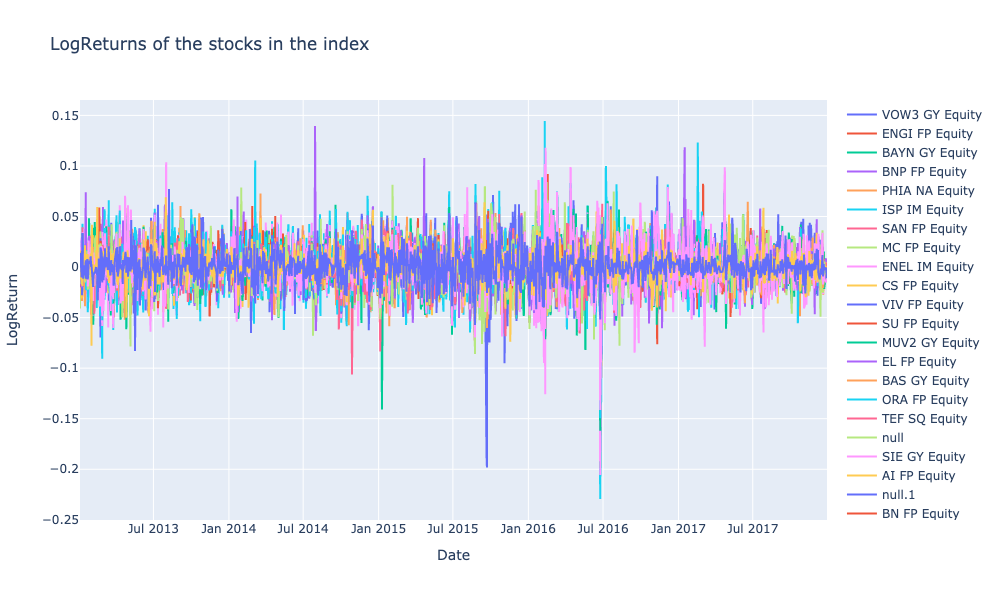

In [20]:
traces = []
for i, stock_name in enumerate(returns.columns):
    trace = go.Scatter(x=returns.index, y=returns[stock_name], mode='lines', name=stock_name)
    traces.append(trace)

# Creating layout
layout = go.Layout(title='LogReturns of the stocks in the index', xaxis=dict(title='Date'), yaxis=dict(title='LogReturn'), width=1000, height=600)

# Creating figure
fig = go.Figure(data=traces, layout=layout)

# Display the figure
fig.show(renderer="png")

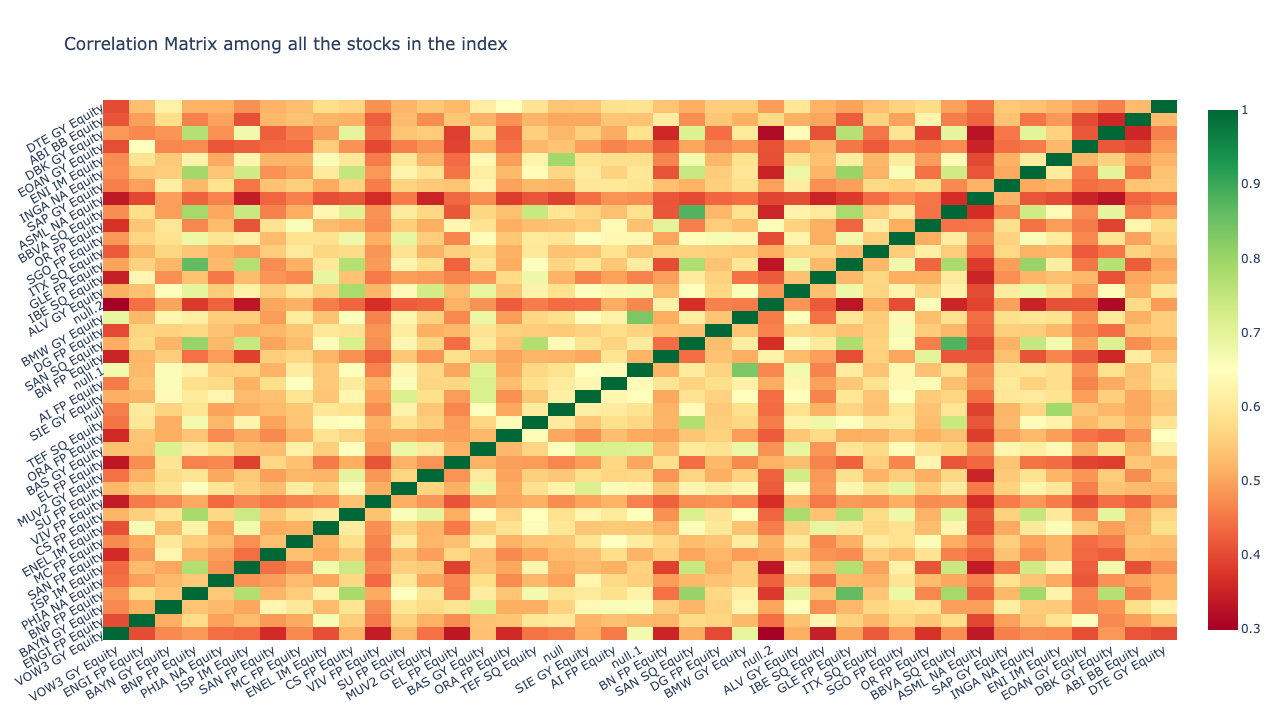

In [21]:
corr_returns = returns.corr(method="pearson")

num_variables = len(corr_returns.columns)

heatmap_trace = go.Heatmap(
    z=corr_returns.values,
    x=corr_returns.columns,
    y=corr_returns.columns,
    colorscale='RdYlGn',
)

# Create the layout
layout = go.Layout(
    title='Correlation Matrix among all the stocks in the index',
    xaxis=dict(categoryorder='array', tickvals=list(range(num_variables)), ticktext=corr_returns.columns, tickangle=-30),
    yaxis=dict(categoryorder='array', tickvals=list(range(num_variables)), ticktext=corr_returns.columns, tickangle=-30, dtick=2),
    width=1280,
    height=720,
)

fig = go.Figure(data=[heatmap_trace], layout=layout)

fig.show(renderer="png")

In [22]:
# print only relevant correlations
relevant_correlations = corr_returns[(corr_returns >= 0.7) & (corr_returns != 1)].dropna(axis=1, how='all').dropna(axis=0, how='all')
for column in relevant_correlations.columns:
    for index, value in relevant_correlations[column].items():
        if not pd.isnull(value):
            print(f"{column} - {index}: {value}")

BAYN GY Equity - BAS GY Equity: 0.712085135139207
BNP FP Equity - ISP IM Equity: 0.7727019299785731
BNP FP Equity - CS FP Equity: 0.7857104989706133
BNP FP Equity - SAN SQ Equity: 0.805673037583436
BNP FP Equity - GLE FP Equity: 0.8619386319622211
BNP FP Equity - BBVA SQ Equity: 0.790816422323625
BNP FP Equity - INGA NA Equity: 0.7925390844784482
BNP FP Equity - DBK GY Equity: 0.7679035692006008
ISP IM Equity - BNP FP Equity: 0.7727019299785731
ISP IM Equity - CS FP Equity: 0.7371574699020061
ISP IM Equity - SAN SQ Equity: 0.744379591181416
ISP IM Equity - GLE FP Equity: 0.7695879158740151
ISP IM Equity - BBVA SQ Equity: 0.7416447738771702
ISP IM Equity - INGA NA Equity: 0.7315631932950534
CS FP Equity - BNP FP Equity: 0.7857104989706133
CS FP Equity - ISP IM Equity: 0.7371574699020061
CS FP Equity - SAN SQ Equity: 0.7167098997228983
CS FP Equity - ALV GY Equity: 0.7840013700661868
CS FP Equity - GLE FP Equity: 0.767948209819731
CS FP Equity - BBVA SQ Equity: 0.7045874406370919
CS FP E

In [23]:
returns.to_pickle("data/stocks_returns.pkl")

### Calculate weighted returns

In [24]:
# Select only the period 2014-2019; fill nas with 0s
# In this way we calculate returns for ALL THE STOCKS that have been part of the index

temp = close_price.loc[dates]
close_price_returns = price_to_returns(temp)
close_price_returns.head()

,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,63DU GY Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,-0.003409,NaN,NaN,0.006623,-0.000559,-0.009342,-0.022612,NaN,...,0.002746,-0.002633,NaN,NaN,0.003136,0.010978,0.097495,-0.012027,-0.000571,-0.000315
2013-01-04,NaN,NaN,0.008362,NaN,NaN,0.000000,-0.000279,-0.005572,0.013609,NaN,...,0.012325,0.003696,NaN,NaN,0.007642,0.007384,0.043190,0.016231,0.014170,0.000788
2013-01-07,NaN,NaN,0.000754,NaN,NaN,-0.013947,-0.016215,-0.006466,-0.024168,NaN,...,0.026380,-0.013677,NaN,NaN,-0.016891,0.028313,0.071123,-0.010204,-0.010366,0.035416
2013-01-08,NaN,NaN,-0.007156,NaN,NaN,-0.019482,-0.011083,0.013883,-0.006604,NaN,...,-0.015553,0.004800,NaN,NaN,-0.002805,0.012439,-0.071853,-0.015389,0.006490,0.008057


In [25]:
close_price_returns.fillna(0., inplace=True)
close_price_returns.drop('2013-01-02', inplace=True) # drop first row of missing observations
close_price_returns.head()

,URW NA Equity,LINU GY Equity,LIN GY Equity,UN01 GY Equity,OSR GY Equity,AMS SQ Equity,VOW3 GY Equity,APAM NA Equity,UL NA Equity,63DU GY Equity,...,INGA NA Equity,ENI IM Equity,RDA NA Equity,AVE FP Equity,EOAN GY Equity,DBK GY Equity,ALU FP Equity,ABI BB Equity,DTE GY Equity,ACA FP Equity
2013-01-03,0.0,0.0,-0.003409,0.0,0.0,0.006623,-0.000559,-0.009342,-0.022612,0.0,...,0.002746,-0.002633,0.0,0.0,0.003136,0.010978,0.097495,-0.012027,-0.000571,-0.000315
2013-01-04,0.0,0.0,0.008362,0.0,0.0,0.000000,-0.000279,-0.005572,0.013609,0.0,...,0.012325,0.003696,0.0,0.0,0.007642,0.007384,0.043190,0.016231,0.014170,0.000788
2013-01-07,0.0,0.0,0.000754,0.0,0.0,-0.013947,-0.016215,-0.006466,-0.024168,0.0,...,0.026380,-0.013677,0.0,0.0,-0.016891,0.028313,0.071123,-0.010204,-0.010366,0.035416
2013-01-08,0.0,0.0,-0.007156,0.0,0.0,-0.019482,-0.011083,0.013883,-0.006604,0.0,...,-0.015553,0.004800,0.0,0.0,-0.002805,0.012439,-0.071853,-0.015389,0.006490,0.008057
2013-01-09,0.0,0.0,-0.007587,0.0,0.0,0.005716,-0.013793,-0.015832,-0.015235,0.0,...,0.025037,0.016985,0.0,0.0,0.013010,0.013252,0.009118,-0.018816,0.033597,0.046298


### Calculate index returns

In [26]:
SX5E_returns = compute_market_returns(index_composition, capitalization, close_price_returns)

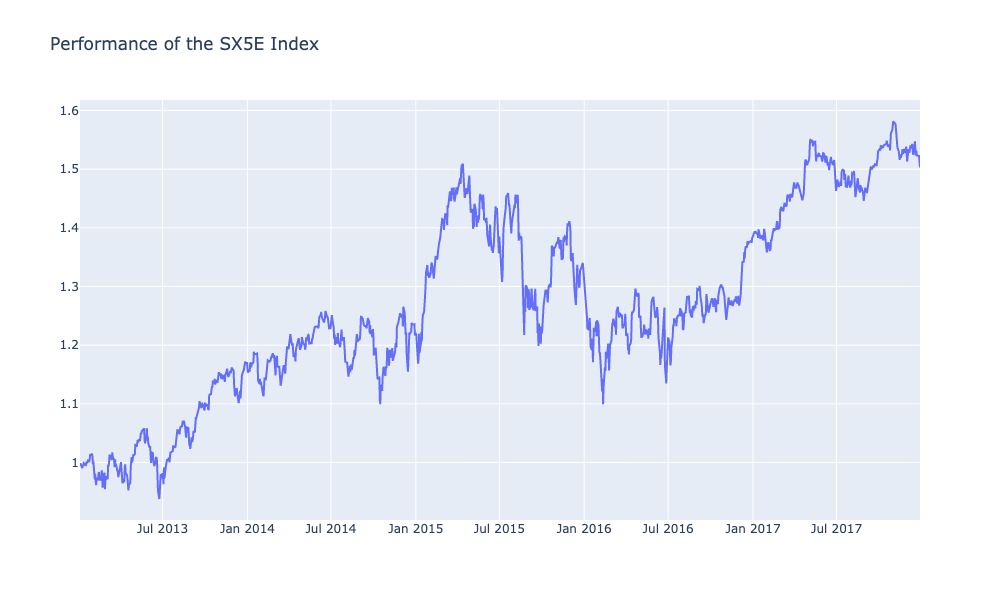

In [27]:
perf_SX5E = cumulative_returns_from_series(SX5E_returns)

trace = go.Scatter(x=perf_SX5E.index, y=perf_SX5E.values, mode='lines', name='SX5E')

fig = go.Figure(data=trace)

fig.update_layout(title='Performance of the SX5E Index', showlegend=False, width=1000, height=600)

fig.show(renderer="png")

In [28]:
SX5E_returns.to_pickle("data/index_returns.pkl")

We observe that the general trend of the index is increasing over the considered time period; a good strategy would ideally trace the same trend but perform better. 

### Robust location estimation

#### Huber location estimator
It is a combination of mean and median, a rubst M-estimator of the location.
$$ \hat{\mu} = min_{\mu} \sum_{i=1}^N \rho (x_i-\mu) $$
Where $\rho$ is the error function to be minimized.

Doing this is necessary to provide the minimum distance between the location estimator and all observations. The minimization is done using algorithms like Simplex or Newton-Raphson.

In [29]:
# Define a function to calculate Huber location estimator
def huber_loc(series):
    return robust.scale.huber(series)[0]

# Apply the function to all rolling columns of the DataFrame
huber_estimates = close_price_red.rolling(window=4).apply(huber_loc)

In [30]:
display(huber_estimates.head(10))

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,EOAN GY Equity,DBK GY Equity,ABI BB Equity,DTE GY Equity
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,153.303055,15.86000,70.940950,44.628749,19.182999,1.38325,72.817169,127.365862,3.2250,13.85125,...,105.687500,7.31400,49.753750,61.625001,7.39075,18.9225,12.611610,29.636568,67.110001,8.79125
2013-01-08,152.227543,15.86125,70.928648,44.937499,19.144297,1.39025,73.003651,126.746267,3.2020,13.79250,...,104.937500,7.35500,49.266251,61.267501,7.43750,18.8850,12.583102,30.074966,66.747501,8.81225
2013-01-09,150.657299,15.83125,71.017216,45.232499,19.123188,1.40675,73.264725,126.047819,3.1965,13.74875,...,104.900000,7.46875,48.888751,61.022501,7.52600,18.9400,12.585294,30.535710,66.277502,8.90875
2013-01-10,149.463482,15.71375,70.822857,45.530000,19.295585,1.43125,73.182673,124.864960,3.1900,13.68500,...,104.537498,7.55700,48.592501,60.807501,7.61550,18.9975,12.551304,31.039016,65.635002,8.97225
2013-01-11,149.484993,15.64500,71.130386,45.695000,19.392925,1.45300,73.289589,124.346758,3.2105,13.64750,...,104.424999,7.63800,48.648750,60.900001,7.66025,19.1425,12.552400,31.353981,65.317503,9.03250
2013-01-14,149.882935,15.54750,71.337048,45.679999,19.512547,1.47050,73.083216,123.806023,3.2235,13.68125,...,104.537498,7.70900,48.700000,61.002501,7.74875,19.2225,12.548014,31.516785,65.152502,9.08250
2013-01-15,150.721832,15.41750,71.295225,45.327499,19.635688,1.48500,72.658039,124.020061,3.2330,13.65875,...,104.724998,7.70650,48.292500,60.422501,7.76475,19.2600,12.455910,31.524233,65.650002,9.03950


### Tukey biweight location estimator


$$ \hat{\mu} = \frac{\sum_{i=1}^N w_i x_i}{\sum_{i=1}^N w_i} $$

where:

- $ \hat{\mu}$ is the robust location estimator
- $x_i$ the i-th observation
- $ w_i = \begin{cases}
(1-((\frac{x_i-m}{c})^2)^2)\ \ \ \text{if} \ |x_i-m| \le c\\
0 \ \ \ \text{otherwise}
\end{cases}$

    - in which $m$ = median of the data and $c$ is the Tukey constant (that controls the degree of robustness)

In [31]:
def tukey_loc(series, c=9):     # try c = 6 and c = 9
    return biweight_location(series, c=c)

tukey_estimates = close_price_red.rolling(window=4).apply(tukey_loc)

In [32]:
display(tukey_estimates.head(10))

,VOW3 GY Equity,ENGI FP Equity,BAYN GY Equity,BNP FP Equity,PHIA NA Equity,ISP IM Equity,SAN FP Equity,MC FP Equity,ENEL IM Equity,CS FP Equity,...,OR FP Equity,BBVA SQ Equity,ASML NA Equity,SAP GY Equity,INGA NA Equity,ENI IM Equity,EOAN GY Equity,DBK GY Equity,ABI BB Equity,DTE GY Equity
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,153.939608,15.863052,70.854575,44.436658,19.238627,1.380126,72.813778,127.405070,3.231326,13.850115,...,105.634999,7.310501,49.852665,61.648194,7.369072,18.959361,12.610719,29.582595,67.114440,8.771007
2013-01-08,152.295129,15.864724,70.827743,44.922120,19.152028,1.390526,73.053974,126.747672,3.202159,13.846611,...,104.938642,7.356010,49.264694,61.258046,7.436251,18.885706,12.580650,30.070623,66.745362,8.812163
2013-01-09,150.639015,15.827395,71.009542,45.323106,19.125098,1.405432,73.282788,126.031903,3.195986,13.749587,...,104.897190,7.447657,48.849551,61.011026,7.526238,18.937751,12.583433,30.564229,66.302363,8.861539
2013-01-10,149.452580,15.727265,70.822367,45.607353,19.161744,1.428110,73.181097,124.892381,3.190310,13.623088,...,104.390636,7.557309,48.616030,60.806893,7.616594,18.997714,12.550908,31.038729,65.602069,8.973196
2013-01-11,149.469007,15.647943,71.089809,45.684501,19.391704,1.453998,73.397973,124.341556,3.210371,13.641131,...,104.406391,7.695797,48.659719,60.888182,7.680333,19.172979,12.552136,31.371286,65.322242,9.052104
2013-01-14,149.933382,15.487656,71.344228,45.629157,19.635128,1.473812,73.101598,123.811027,3.212000,13.681092,...,104.542030,7.710230,48.700000,61.015621,7.751773,19.216099,12.548296,31.527151,65.151129,9.082648
2013-01-15,151.252415,15.418798,71.295815,45.688668,19.628250,1.485061,72.674043,123.981557,3.232909,13.658883,...,104.692494,7.706911,48.428008,60.776038,7.762634,19.263300,12.466558,31.531555,65.562005,9.037267


In [33]:
tukey_estimates.describe().T

,count,mean,std,min,25%,50%,75%,max
VOW3 GY Equity,1269.0,137.694024,30.070452,81.637064,111.565320,140.070282,159.005961,215.155454
ENGI FP Equity,1269.0,15.971084,2.452259,10.993807,14.070445,15.578227,18.354136,20.965464
BAYN GY Equity,1269.0,102.191095,15.516860,68.301061,91.639034,101.402870,111.983974,142.047447
BNP FP Equity,1269.0,52.874898,7.288170,38.580805,46.970450,52.783389,57.565468,68.458571
PHIA NA Equity,1269.0,24.040355,3.284057,19.125098,21.745197,23.015583,25.416836,33.336432
ISP IM Equity,1269.0,2.356053,0.588273,1.136989,1.957704,2.380126,2.839542,3.550144
SAN FP Equity,1269.0,79.018853,6.796367,67.401127,73.999030,77.552627,83.685671,99.325170
MC FP Equity,1269.0,154.975623,37.699822,109.391660,125.237794,147.006276,168.050623,257.321721
ENEL IM Equity,1269.0,3.905818,0.673259,2.327872,3.644195,3.977320,4.204341,5.542701
CS FP Equity,1269.0,20.526409,3.369868,12.973696,18.145753,20.488746,23.694560,26.030655


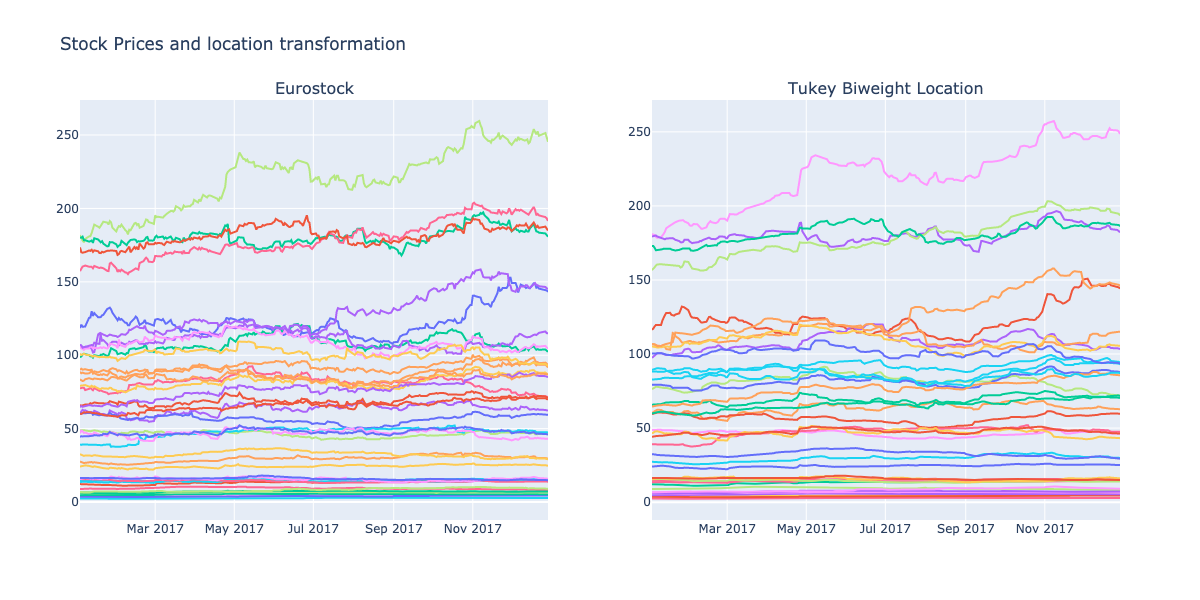

In [37]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Eurostock', 'Tukey Biweight Location'])

for stock in close_price_red.columns:
    fig.add_trace(go.Scatter(x=close_price_red.loc['2017-01-02':'2017-12-29'].index, y=close_price_red.loc['2017-01-02':'2017-12-29', stock], mode='lines', name=stock), row=1, col=1)
    
for stock in huber_estimates.columns:
    fig.add_trace(go.Scatter(x=tukey_estimates.loc['2017-01-02':'2017-12-29'].index, y=tukey_estimates.loc['2017-01-02':'2017-12-29', stock], mode='lines', name=stock), row=1, col=2)

fig.update_layout(title_text='Stock Prices and location transformation', showlegend=False, width=1200, height=600)
fig.show(renderer="png")

As we can see from these exploratory plots, the location estimators are both really robust (we are not interested in the name of these stocks). Both are "softening" a bit the time series.

The choice between Tukey and Huber is arbitrary but Tukey seems a bit more robust than Huber in this case, probably due to the mathematical formulation of Tukey, giving less weight to extreme values. For theoretical purposes we proceed the analysis with the Tukey Biweight robust location estimator with a c=9 (which is good since financial data are extremely volatile and a high value of c can help mitigate even more these fluctuations).

In [35]:
tukey_estimates.shape

(1272, 41)

In [36]:
# Save data
tukey_estimates.dropna().to_pickle("data/tukey_estimates.pkl")
huber_estimates.dropna().to_pickle("data/huber_estimates.pkl")